In [1]:
import torch
import torchvision
import os
import numpy as np
import torchvision.transforms as transforms
root = './data'
if not os.path.exists(root):
    os.mkdir(root)

In [109]:
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])
trainset = torchvision.datasets.CIFAR10(root=root, train=False,transform=transform, download=True)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR10(root=root, train=False, transform=transform, download=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)
classes = ('Aeroplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck')
print(len(trainset))
print(len(testset))

Files already downloaded and verified
Files already downloaded and verified
10000
10000


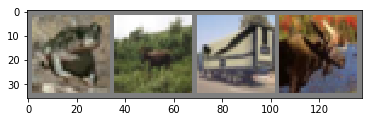

In [110]:
import matplotlib.pyplot as plt
import numpy as np
def imshow(img):
    img = img/2 + 0.5     # unnormalize
    npimg = img.numpy()
    x = np.transpose(npimg, (1, 2, 0))
    plt.imshow(x)

dataiter = iter(trainloader)
images, labels = dataiter.next()
imshow(torchvision.utils.make_grid(images))

In [111]:
import torch.nn as nn
import torch.nn.functional as F
class CIFAR10(nn.Module):
    def __init__(self):
        super(CIFAR10, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2, 2)
        x = x.view(-1, 5*5*16)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
    def name(self):
        return "CIFAR10"
        

In [112]:
import torch.optim as optim
model = CIFAR10()
optimizer = optim.SGD(model.parameters(), lr=0.001,momentum = 0.9)
criterion = nn.CrossEntropyLoss()

In [113]:
for epoch in range(10):
    # trainning
    ave_loss = 0
    for i,data in enumerate(trainloader,0):
        inputs, label = data
        optimizer.zero_grad()
        out = model(inputs)
        loss = criterion(out,label)
        loss.backward()
        optimizer.step()
        ave_loss+= loss.item()
        if i % 200 == 199:    # print every 200 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, ave_loss / 200))
            ave_loss = 0.0
print("Finished Training")

[1,   200] loss: 2.301
[1,   400] loss: 2.294
[1,   600] loss: 2.270
[1,   800] loss: 2.223
[1,  1000] loss: 2.168
[1,  1200] loss: 2.098
[1,  1400] loss: 2.026
[1,  1600] loss: 1.964
[1,  1800] loss: 1.925
[1,  2000] loss: 1.973
[1,  2200] loss: 1.906
[1,  2400] loss: 1.883
[2,   200] loss: 1.787
[2,   400] loss: 1.791
[2,   600] loss: 1.749
[2,   800] loss: 1.786
[2,  1000] loss: 1.708
[2,  1200] loss: 1.802
[2,  1400] loss: 1.718
[2,  1600] loss: 1.709
[2,  1800] loss: 1.679
[2,  2000] loss: 1.651
[2,  2200] loss: 1.652
[2,  2400] loss: 1.595
[3,   200] loss: 1.560
[3,   400] loss: 1.592
[3,   600] loss: 1.579
[3,   800] loss: 1.564
[3,  1000] loss: 1.509
[3,  1200] loss: 1.531
[3,  1400] loss: 1.555
[3,  1600] loss: 1.525
[3,  1800] loss: 1.531
[3,  2000] loss: 1.525
[3,  2200] loss: 1.537
[3,  2400] loss: 1.530
[4,   200] loss: 1.484
[4,   400] loss: 1.464
[4,   600] loss: 1.382
[4,   800] loss: 1.424
[4,  1000] loss: 1.500
[4,  1200] loss: 1.446
[4,  1400] loss: 1.406
[4,  1600] 

In [114]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print(total)
print(correct)
print(100 * correct / total)

10000
7000
70.0
